<a href="https://colab.research.google.com/github/alexandersanchezjr/fvl-prediction-model/blob/main/Prediccion%20de%20inasistencias%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS EXPLORATORIO DE DATOS

In [225]:
#Importamos las librerias necesarias
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import HistGradientBoostingRegressor

## CARGA DEL DATASET

In [226]:
df1 = pd.read_excel("./appointment-ds.XLSX")
df2 = pd.read_excel("./sociodemographic-ds.XLSX")

### DATASET 1

Estos datos representan la información por paciente recuperada directamente desde la Fundación Valle de Lili y proporcionada por ellos. Aquí pueden detallarse los registros por cita de cada uno de estos pacientes y, finalmente, si asistió o no:

In [227]:
#Tipos de datos de las variables del dataset 1
tipos_datos1 = df1.dtypes
print(tipos_datos1)

Fecha                                 datetime64[ns]
Hora                                          object
Hora.1                                         int64
Día de la semana                              object
Horario laboral \n(Si = 1; No = 0)             int64
Franja horaria                                object
Día festivo                                    int64
Num Dcto Modif                                 int64
Edad                                         float64
Fecha crea. cita                      datetime64[ns]
Tiempo entre creación cita y cita              int64
Agente Cita                                   object
Confirmado por email                           int64
Paciente NO ubicado                            int64
Confirmado FAMILIAR                            int64
Confirmado PACIENTE                            int64
Confirmado                                     int64
Antecedente No Show                            int64
Antecedente Cita Asistida                     

In [228]:
#Tipos de datos de las variables del dataset 2
tipos_datos2 = df2.dtypes
print(tipos_datos2)

Num Dcto Modif                       int64
Fecha de nacimiento         datetime64[ns]
Sexo                                object
Grupo étnico                        object
Estrato socioeconómico             float64
Comuna                             float64
Municipio de residencia             object
Ciudad de residencia                object
Barrio de residencia                object
Codigo aseguradora                  object
Seguridad social                    object
Régimen salud                       object
Cotizante o beneficiario            object
dtype: object


In [229]:
for i, col in enumerate(df1.columns):
    print(f'Columna {i + 1}: {col}')

Columna 1: Fecha
Columna 2: Hora
Columna 3: Hora.1
Columna 4: Día de la semana
Columna 5: Horario laboral 
(Si = 1; No = 0)
Columna 6: Franja horaria
Columna 7: Día festivo
Columna 8: Num Dcto Modif
Columna 9: Edad
Columna 10: Fecha crea. cita
Columna 11: Tiempo entre creación cita y cita
Columna 12: Agente Cita
Columna 13: Confirmado por email
Columna 14: Paciente NO ubicado
Columna 15: Confirmado FAMILIAR
Columna 16: Confirmado PACIENTE
Columna 17: Confirmado
Columna 18: Antecedente No Show
Columna 19: Antecedente Cita Asistida
Columna 20: Antecedente Cita Cancelada
Columna 21: Estudio Simple
Columna 22: Parte del Cuerpo
Columna 23: Anestesia
Columna 24: Reprogramación
Columna 25: Reprogramación por paciente
Columna 26: Cita adelantada
Columna 27: Aseguradora
Columna 28: Voluntario
Columna 29: RS / RC
Columna 30: Tipo de Cita VARIABLE OBJETIVO


In [230]:
df1.shape

(29169, 30)

### DATASET 2

En este conjunto de datos podemos encontrar la información sociodemográfica por paciente, de modo que se puede encontrar con mayor detalle el trasfondo que tiene cada paciente y así hacer un análisis exhaustivo a cada caso pertinente:

In [231]:
for i, col in enumerate(df2.columns):
    print(f'Columna {i + 1}: {col}')

Columna 1: Num Dcto Modif
Columna 2: Fecha de nacimiento
Columna 3: Sexo
Columna 4: Grupo étnico
Columna 5: Estrato socioeconómico
Columna 6: Comuna
Columna 7: Municipio de residencia
Columna 8: Ciudad de residencia
Columna 9: Barrio de residencia
Columna 10: Codigo aseguradora
Columna 11: Seguridad social
Columna 12: Régimen salud
Columna 13: Cotizante o beneficiario


In [232]:
df2.shape

(21793, 13)

In [233]:
#Cargamos el dataset
df = pd.merge(df1,df2,on='Num Dcto Modif',how='inner')
df.head(50)

,Fecha,Hora,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,2018-01-02,08:30:00,8,martes,1,6 - 12,0,1,2.208219,2017-11-01,...,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,2018-01-02,16:05:00,16,martes,1,12 - 18,0,2,54.128767,2018-01-02,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,2018-01-02,17:15:00,17,martes,1,12 - 18,0,3,17.309589,2017-12-18,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,2018-01-02,11:25:00,11,martes,1,6 - 12,0,4,55.586301,2018-01-02,...,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,2018-01-02,10:50:00,10,martes,1,6 - 12,0,5,29.641096,2017-12-29,...,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
5,2018-01-02,16:05:00,16,martes,1,12 - 18,0,6,61.967123,2018-01-02,...,NaN,3.0,7.0,VALLE DEL CAUCA,CALI,SILOE,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,No aplica cobertura
6,2018-01-02,07:20:00,7,martes,1,6 - 12,0,7,24.383562,2017-12-29,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
7,2018-12-27,07:20:00,7,jueves,1,6 - 12,0,7,25.367123,2018-12-18,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
8,2018-01-02,10:15:00,10,martes,1,6 - 12,0,8,34.432877,2017-12-28,...,NaN,2.0,6.0,VALLE DEL CAUCA,CALI,PETECUY PRIMERA ETAPA,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
9,2018-01-02,14:20:00,14,martes,1,12 - 18,0,9,35.873973,2018-01-02,...,NaN,2.0,13.0,VALLE DEL CAUCA,PALMIRA,PALMIRA,1000000240,Coomeva Eps S.A. Npbs,Entid Prom De Salud Contribut,Cat A: Cotizante


### INFORMACION DE LAS COLUMNAS DEL DATASET

In [234]:
print(f"Número de columnas: {df.columns.size}")
df.columns

Número de columnas: 42


Index(['Fecha', 'Hora', 'Hora.1', 'Día de la semana',
       'Horario laboral \n(Si = 1; No = 0)', 'Franja horaria', 'Día festivo',
       'Num Dcto Modif', 'Edad', 'Fecha crea. cita',
       'Tiempo entre creación cita y cita', 'Agente Cita',
       'Confirmado por email', 'Paciente NO ubicado', 'Confirmado FAMILIAR',
       'Confirmado PACIENTE', 'Confirmado', 'Antecedente No Show',
       'Antecedente Cita Asistida', 'Antecedente Cita Cancelada',
       'Estudio Simple', 'Parte del Cuerpo', 'Anestesia', 'Reprogramación',
       'Reprogramación por paciente', 'Cita adelantada', 'Aseguradora',
       'Voluntario', 'RS / RC', 'Tipo de Cita VARIABLE OBJETIVO',
       'Fecha de nacimiento', 'Sexo', 'Grupo étnico', 'Estrato socioeconómico',
       'Comuna', 'Municipio de residencia', 'Ciudad de residencia',
       'Barrio de residencia', 'Codigo aseguradora', 'Seguridad social',
       'Régimen salud', 'Cotizante o beneficiario'],
      dtype='object')

In [235]:
df.shape

(29171, 42)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              29171 non-null  datetime64[ns]
 1   Hora                               29171 non-null  object        
 2   Hora.1                             29171 non-null  int64         
 3   Día de la semana                   29171 non-null  object        
 4   Horario laboral 
(Si = 1; No = 0)  29171 non-null  int64         
 5   Franja horaria                     29171 non-null  object        
 6   Día festivo                        29171 non-null  int64         
 7   Num Dcto Modif                     29171 non-null  int64         
 8   Edad                               29171 non-null  float64       
 9   Fecha crea. cita                   29171 non-null  datetime64[ns]
 10  Tiempo entre creación cita y cita 

In [237]:
df.describe()

,Fecha,Hora.1,Horario laboral \n(Si = 1; No = 0),Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,Confirmado por email,Paciente NO ubicado,...,Antecedente Cita Asistida,Antecedente Cita Cancelada,Estudio Simple,Anestesia,Reprogramación,Reprogramación por paciente,Cita adelantada,Fecha de nacimiento,Estrato socioeconómico,Comuna
count,29171,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171,29171.000000,29171.000000,29171.000000,...,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29171.000000,29141,24690.000000,24714.000000
mean,2019-04-05 11:58:11.892632832,12.621988,0.623187,0.028864,10215.078948,49.255579,2019-03-24 11:58:29.663707136,11.999794,0.013815,0.059957,...,0.235679,0.057866,0.426725,0.052758,0.141922,0.075315,0.008776,1970-01-11 23:27:32.064102124,3.540867,12.959254
min,2018-01-02 00:00:00,0.000000,0.000000,0.000000,1.000000,0.309589,2015-03-04 00:00:00,-65.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920-03-14 00:00:00,1.000000,1.000000
25%,2018-08-30 00:00:00,9.000000,0.000000,0.000000,4682.000000,35.993151,2018-08-23 00:00:00,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1955-12-13 00:00:00,2.000000,7.000000
50%,2019-04-07 00:00:00,13.000000,1.000000,0.000000,9905.000000,51.547945,2019-03-26 00:00:00,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1967-10-14 00:00:00,3.000000,16.000000
75%,2019-11-03 00:00:00,16.000000,1.000000,0.000000,15565.500000,63.382192,2019-10-17 00:00:00,15.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1983-05-06 00:00:00,5.000000,17.000000
max,2020-07-31 00:00:00,23.000000,1.000000,1.000000,21793.000000,98.586301,2020-07-30 00:00:00,1309.000000,1.000000,1.000000,...,9.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2019-12-26 00:00:00,6.000000,22.000000
std,NaN,4.517094,0.484596,0.167428,6289.421974,19.103048,NaN,16.493688,0.116725,0.237411,...,0.590018,0.301085,0.494610,0.223554,0.348976,0.263903,0.093269,NaN,1.465126,6.236423


### VERIFICACION DE DATOS FALTANTES

In [238]:
df.head(50)

,Fecha,Hora,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,2018-01-02,08:30:00,8,martes,1,6 - 12,0,1,2.208219,2017-11-01,...,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,2018-01-02,16:05:00,16,martes,1,12 - 18,0,2,54.128767,2018-01-02,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,2018-01-02,17:15:00,17,martes,1,12 - 18,0,3,17.309589,2017-12-18,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,2018-01-02,11:25:00,11,martes,1,6 - 12,0,4,55.586301,2018-01-02,...,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,2018-01-02,10:50:00,10,martes,1,6 - 12,0,5,29.641096,2017-12-29,...,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
5,2018-01-02,16:05:00,16,martes,1,12 - 18,0,6,61.967123,2018-01-02,...,NaN,3.0,7.0,VALLE DEL CAUCA,CALI,SILOE,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,No aplica cobertura
6,2018-01-02,07:20:00,7,martes,1,6 - 12,0,7,24.383562,2017-12-29,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
7,2018-12-27,07:20:00,7,jueves,1,6 - 12,0,7,25.367123,2018-12-18,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
8,2018-01-02,10:15:00,10,martes,1,6 - 12,0,8,34.432877,2017-12-28,...,NaN,2.0,6.0,VALLE DEL CAUCA,CALI,PETECUY PRIMERA ETAPA,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
9,2018-01-02,14:20:00,14,martes,1,12 - 18,0,9,35.873973,2018-01-02,...,NaN,2.0,13.0,VALLE DEL CAUCA,PALMIRA,PALMIRA,1000000240,Coomeva Eps S.A. Npbs,Entid Prom De Salud Contribut,Cat A: Cotizante


### VERIFICACION DE DATOS FALTANTES

In [239]:
df.isna().sum().sort_values()

Fecha                                     0
Tipo de Cita VARIABLE OBJETIVO            0
Cita adelantada                           0
Reprogramación por paciente               0
Reprogramación                            0
Anestesia                                 0
Parte del Cuerpo                          0
Antecedente Cita Cancelada                0
Antecedente Cita Asistida                 0
Antecedente No Show                       0
Confirmado                                0
Confirmado PACIENTE                       0
Confirmado FAMILIAR                       0
Estudio Simple                            0
Confirmado por email                      0
Hora                                      0
Paciente NO ubicado                       0
Hora.1                                    0
Día de la semana                          0
Franja horaria                            0
Día festivo                               0
Horario laboral \n(Si = 1; No = 0)        0
Num Dcto Modif                  

Feature selection con wrapper
Matriz de correlación entre variables
Grid search para tuning

### Identificación de variables categóricas

En esta sección se identificarán que variables de nuestro dataset contiene valores categóricos.

In [240]:
categorical_columns = df.select_dtypes(include=["object"]).columns
categorical_columns

Index(['Hora', 'Día de la semana', 'Franja horaria', 'Agente Cita',
       'Parte del Cuerpo', 'Aseguradora', 'Voluntario', 'RS / RC',
       'Tipo de Cita VARIABLE OBJETIVO', 'Sexo', 'Grupo étnico',
       'Municipio de residencia', 'Ciudad de residencia',
       'Barrio de residencia', 'Codigo aseguradora', 'Seguridad social',
       'Régimen salud', 'Cotizante o beneficiario'],
      dtype='object')

In [241]:
categorical_df = df[categorical_columns]
for column in categorical_df.columns:
    unique_values_size = categorical_df[column].unique().size
    print(f"Número de valores únicos en '{column}': {unique_values_size}")

Número de valores únicos en 'Hora': 183
Número de valores únicos en 'Día de la semana': 7
Número de valores únicos en 'Franja horaria': 4
Número de valores únicos en 'Agente Cita': 34
Número de valores únicos en 'Parte del Cuerpo': 10
Número de valores únicos en 'Aseguradora': 11
Número de valores únicos en 'Voluntario': 3
Número de valores únicos en 'RS / RC': 4
Número de valores únicos en 'Tipo de Cita VARIABLE OBJETIVO': 3
Número de valores únicos en 'Sexo': 3
Número de valores únicos en 'Grupo étnico': 9
Número de valores únicos en 'Municipio de residencia': 31
Número de valores únicos en 'Ciudad de residencia': 200
Número de valores únicos en 'Barrio de residencia': 450
Número de valores únicos en 'Codigo aseguradora': 252
Número de valores únicos en 'Seguridad social': 218
Número de valores únicos en 'Régimen salud': 18
Número de valores únicos en 'Cotizante o beneficiario': 19


In [242]:
target_unique_values = categorical_df["Tipo de Cita VARIABLE OBJETIVO"].unique()
print(f"Valores únicos en 'Tipo de Cita VARIABLE OBJETIVO': {target_unique_values}")

Valores únicos en 'Tipo de Cita VARIABLE OBJETIVO': ['ATENDIDA' 'CANCELADA' 'ASIGNADA']


### DISTRIBUCION DE VARIABLES NÚMERICAS

Acá veremos la distribución de las variables númericas de nuestro dataset

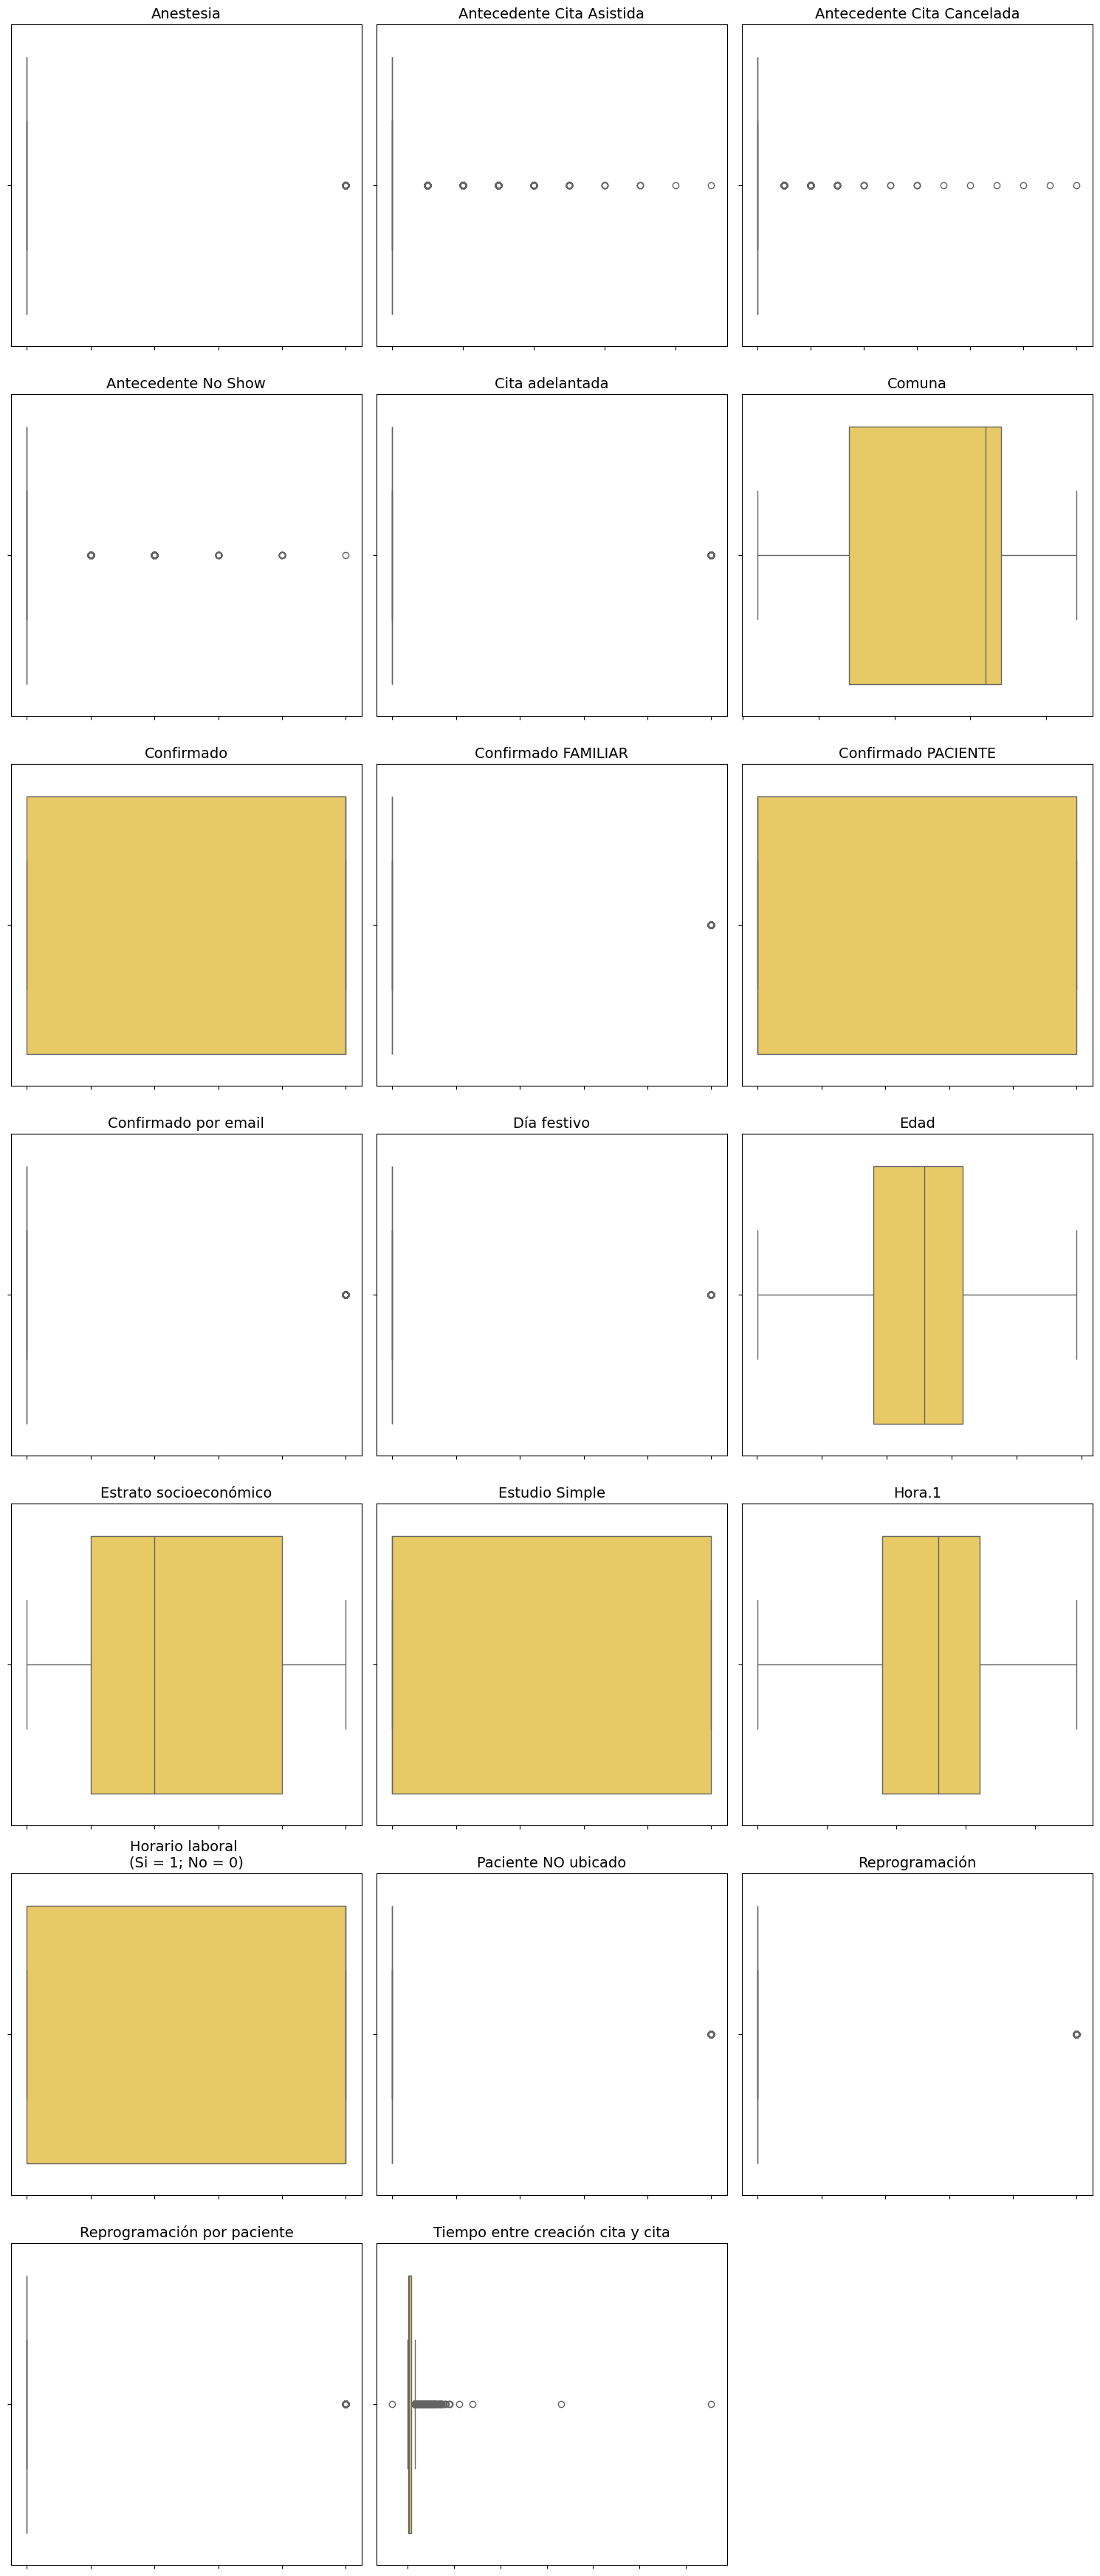

In [243]:
# Define columns to include
cols_to_include = [col for col in df.columns.difference(categorical_columns)  if df[col].dtype in [np.float64, np.int64]]
cols_to_include.remove("Num Dcto Modif")
# Define number of columns and rows for subplots
n_cols = 3
n_rows = int(np.ceil(len(cols_to_include) / n_cols))

# Create subplots and plot data on each one
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), sharey=True)

for idx, atr in enumerate(cols_to_include):
    ax = axes.flat[idx]
    sns.boxplot(x=df[atr], color='#FCD451', ax=ax)
    ax.set_title(atr, fontsize=14)
    ax.set(xlabel='', ylabel='', xticklabels=[], yticklabels=[])

# Remove excess subplots
for idx in range(len(cols_to_include), n_rows * n_cols):
    fig.delaxes(axes.flat[idx])

# Adjust layout and display plot
plt.tight_layout()
plt.show()


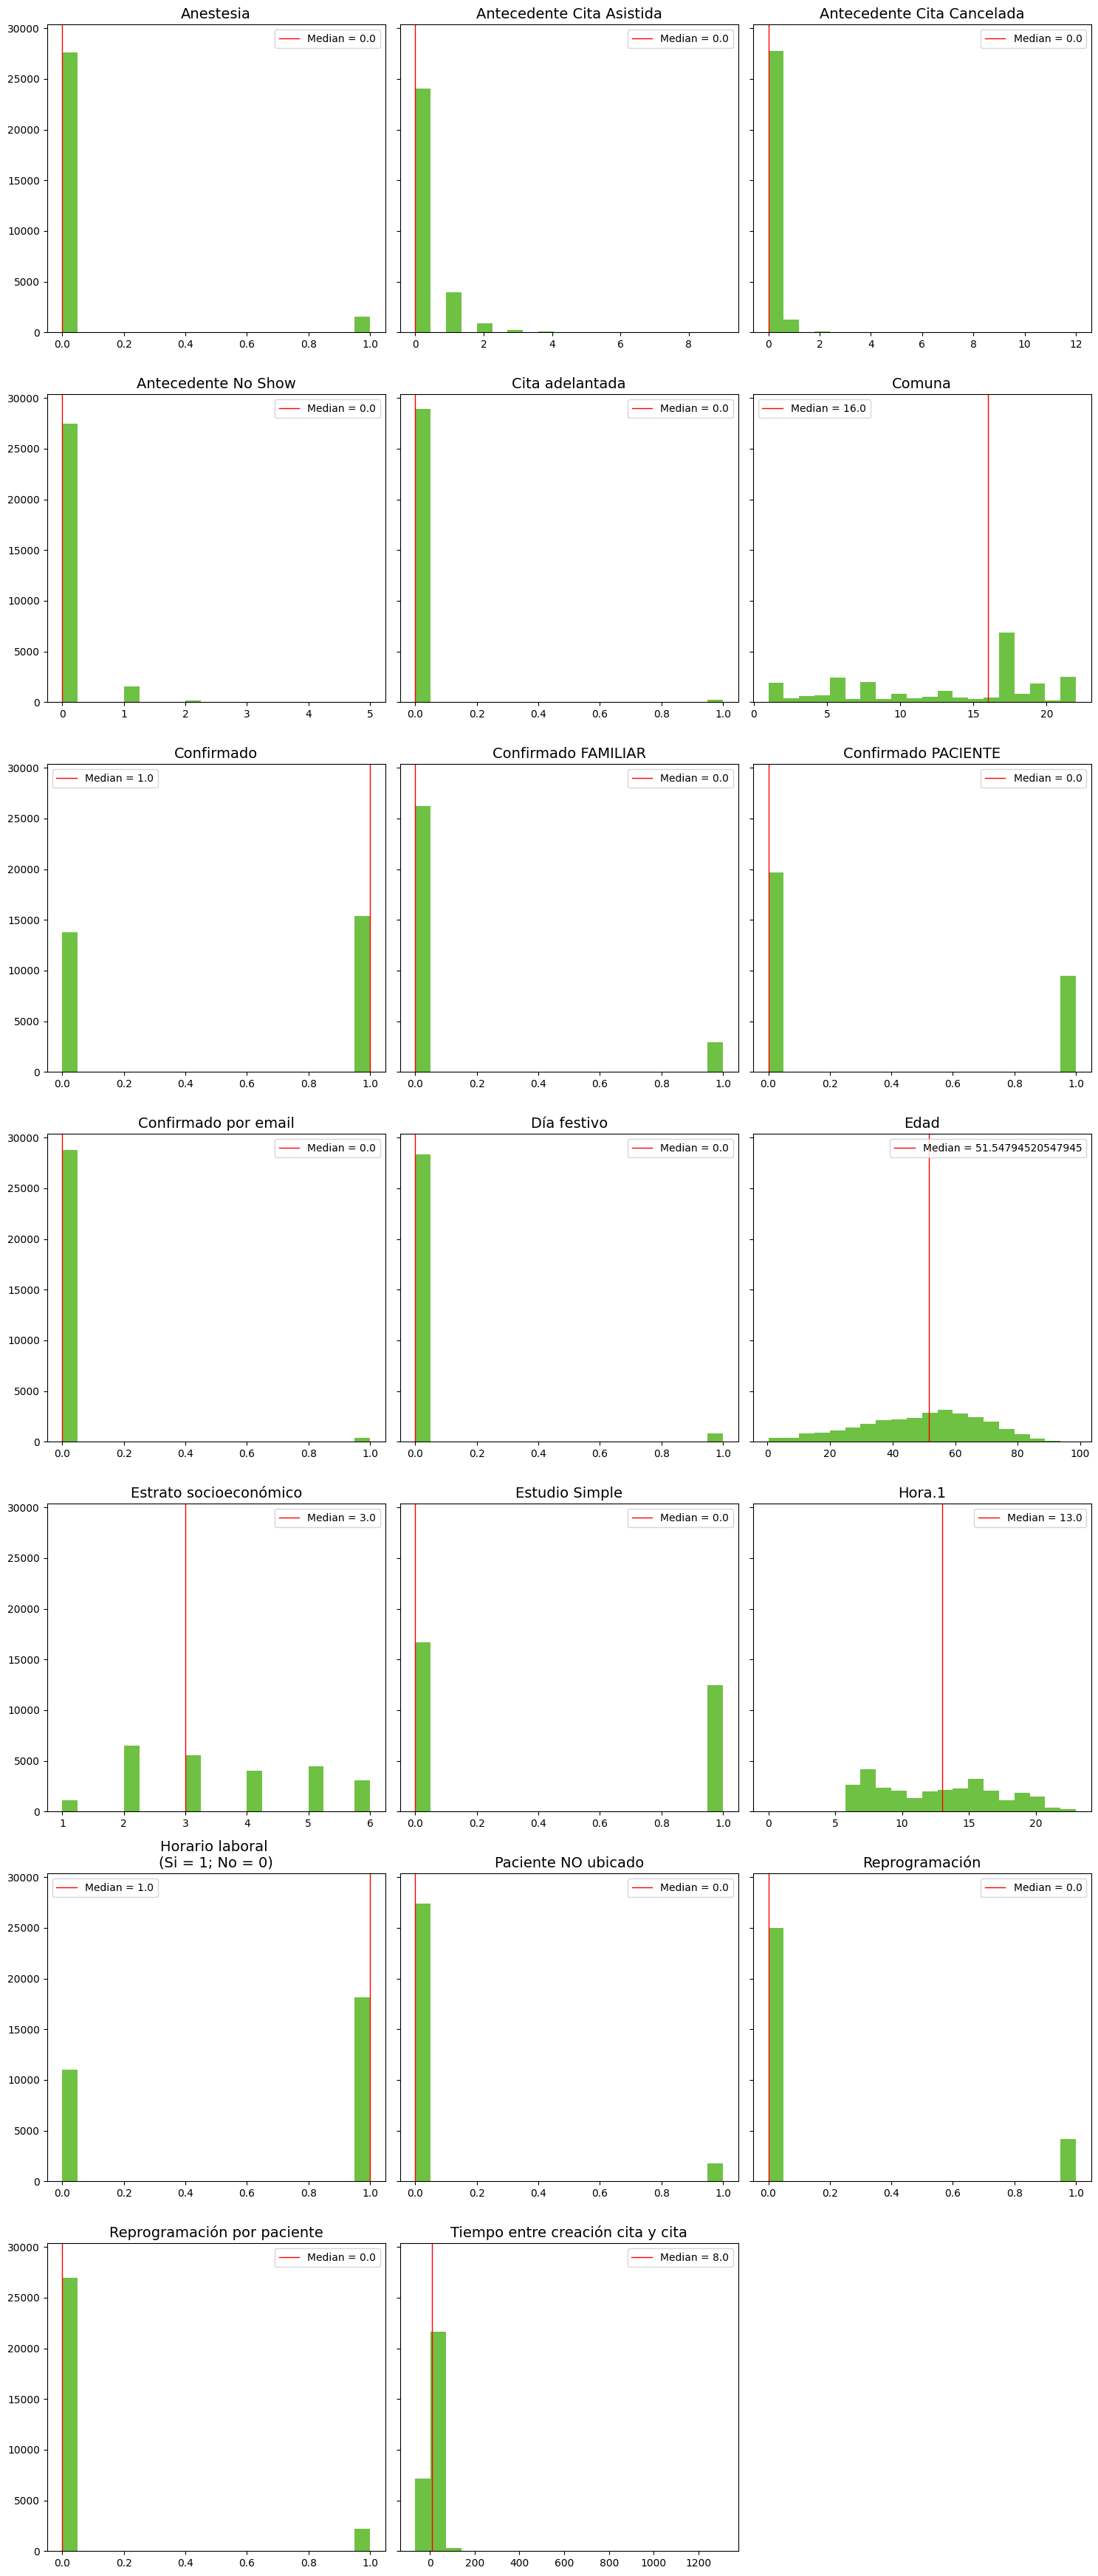

In [244]:
#cols_to_include = df.select_dtypes(include=np.number).columns

# Define number of columns and rows for subplots
n_cols = 3
n_rows = int(np.ceil(len(cols_to_include) / n_cols))

# Create subplots and plot data on each one
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows), sharey=True)

for ax, atr in zip(axes.flat, cols_to_include):
    ax.hist(df[atr], color='#6FC143', bins=20)
    ax.axvline(df[atr].median(), color='red', label=f"Median = {df[atr].median()}", linewidth=1)
    ax.set_title(atr, fontsize=14)
    ax.set(xlabel='', ylabel='')
    ax.legend()

# Remove last two empty subplot
fig.delaxes(axes[-1, -1])

# Adjust layout and display plot
plt.tight_layout()
plt.show()

### DISTRIBUCION DE LA VARIABLE OBJETIVO

In [245]:
appoiment_show = [value for value in df["Tipo de Cita VARIABLE OBJETIVO"] if value == "ATENDIDA"] # registros en donde si asistio a la cita
appoiment_no_show = [value for value in df["Tipo de Cita VARIABLE OBJETIVO"] if value != "ATENDIDA"] # registros en donde no asistio a la cita

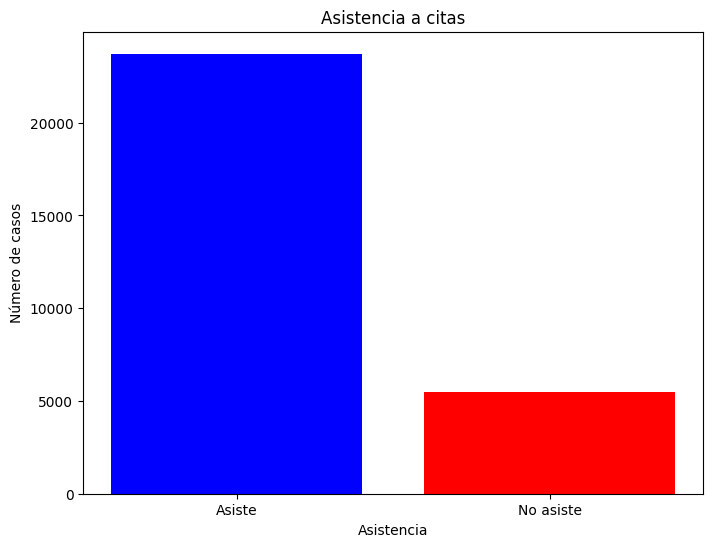

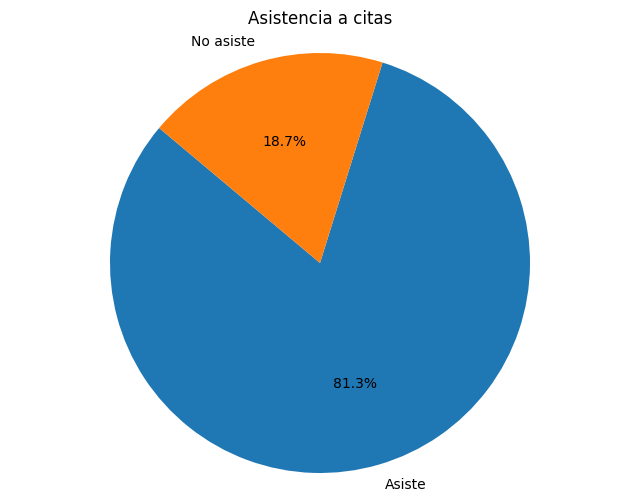

In [246]:
labels = ["Asiste","No asiste"]
amount = [len(appoiment_show), len(appoiment_no_show)]

plt.figure(figsize=(8, 6))
plt.bar(labels, amount, color=['blue', 'red'])
plt.title('Asistencia a citas')
plt.xlabel('Asistencia')
plt.ylabel('Número de casos')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(amount, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Asistencia a citas')
plt.show()



### CONCLUSIONES DEL ANALISIS EXPLORATORIO DE DATOS

Después de realizar en análisis exploratorio de datos , se pueden llegar a las siguientes conclusiones:

- El dataset cuenta con una gran mayoría de  variables categóricas, lo cual implicará plantear estrategias para categorizar cada una

- Entre los datos encontramos que la mayoría de pacientes asisten a la cita y gracias a se podrán evaluar los factores que influyeron en que los pacientes si asistieran a la cita.

- El dataset cuentan con una buena calidad, al poseer muy pocos datos faltantes. Lo que hará que su respectiva limpieza y/o imputación  no requiera mucho trabajo.

- Algunos atributos numéricos del dataset no cuentan con una distribución normal, según las graficas; eso va a requerir evaluar la relevancia de esos atributos a la hora de preparar los datos.

- Los atributos categóricos que fueron identificados son muy buenos candidatos para la construcción del modelo , mientras que los numéricos no tanto; sin embargo, aún se requiere evaluar su relación con la variable objetivo para así definir su relevancia a la hora de crear el modelo.

<hr>

## PREPROCESAMIENTO DE DATOS

### Selección de atributos

In [247]:
feature_df = df.drop(["Tipo de Cita VARIABLE OBJETIVO", "Hora"],axis=1)
target_feature = df["Tipo de Cita VARIABLE OBJETIVO"]

feature_df.head(50)

,Fecha,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,2018-01-02,8,martes,1,6 - 12,0,1,2.208219,2017-11-01,62,...,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,2018-01-02,16,martes,1,12 - 18,0,2,54.128767,2018-01-02,0,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,2018-01-02,17,martes,1,12 - 18,0,3,17.309589,2017-12-18,15,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,2018-01-02,11,martes,1,6 - 12,0,4,55.586301,2018-01-02,0,...,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,2018-01-02,10,martes,1,6 - 12,0,5,29.641096,2017-12-29,4,...,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
5,2018-01-02,16,martes,1,12 - 18,0,6,61.967123,2018-01-02,0,...,NaN,3.0,7.0,VALLE DEL CAUCA,CALI,SILOE,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,No aplica cobertura
6,2018-01-02,7,martes,1,6 - 12,0,7,24.383562,2017-12-29,4,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
7,2018-12-27,7,jueves,1,6 - 12,0,7,25.367123,2018-12-18,9,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,EL REFUGIO,1000003036,Servicio Occid. De Salud Rc,Entid Prom De Salud Contribut,Cat B: Cotizante
8,2018-01-02,10,martes,1,6 - 12,0,8,34.432877,2017-12-28,5,...,NaN,2.0,6.0,VALLE DEL CAUCA,CALI,PETECUY PRIMERA ETAPA,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura
9,2018-01-02,14,martes,1,12 - 18,0,9,35.873973,2018-01-02,0,...,NaN,2.0,13.0,VALLE DEL CAUCA,PALMIRA,PALMIRA,1000000240,Coomeva Eps S.A. Npbs,Entid Prom De Salud Contribut,Cat A: Cotizante


In [248]:
feature_df.tail(50)

,Fecha,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
29121,2020-07-28,13,martes,1,12 - 18,0,21745,12.936986,2020-07-21,7,...,NaN,2.0,18.0,CAUCA,POPAYÁN,POPAYÁN,1000002509,Emssanar Eps S.A.S. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
29122,2020-07-28,16,martes,1,12 - 18,0,21746,36.372603,2020-07-10,18,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000345,Compañia Seguros Bolivar S.A.,Aseguradoras,Ampar plan volun sal
29123,2020-07-28,14,martes,1,12 - 18,0,21747,15.956164,2020-07-14,14,...,NaN,3.0,3.0,VALLE DEL CAUCA,SAN PEDRO,SAN PEDRO,1000003039,Servicio Occid. De Salud Pbs Onco,Entid Prom De Salud Contribut,Cat. A: Beneficiario
29124,2020-07-28,17,martes,1,12 - 18,0,21748,56.534247,2020-07-22,6,...,Otro,4.0,17.0,VALLE DEL CAUCA,CALI,LILI,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,Sin régimen
29125,2020-07-28,17,martes,1,12 - 18,0,21749,79.147945,2020-07-14,14,...,NaN,4.0,19.0,VALLE DEL CAUCA,CALI,SANTA MONICA,1000002598,Eps Suramericana S.A Pgp Oncologia,Entid Prom De Salud Contribut,Cat C: Cotizante
29126,2020-07-29,12,miércoles,1,12 - 18,0,21750,37.301370,2020-07-28,1,...,NaN,1.0,14.0,VALLE DEL CAUCA,CALI,LAS QUINTAS DE DON SIMON,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
29127,2020-07-29,14,miércoles,1,12 - 18,0,21751,80.542466,2020-07-21,8,...,Mestizo,2.0,15.0,VALLE DEL CAUCA,CALI,CRISTOBAL COLON,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
29128,2020-07-29,14,miércoles,1,12 - 18,0,21752,74.887671,2020-07-21,8,...,NaN,5.0,19.0,VALLE DEL CAUCA,CALI,EL LIDO,1000000198,Nueva Eps S.A. Oncologia Rc,Entid Prom De Salud Contribut,Cat A: Cotizante
29129,2020-07-29,16,miércoles,1,12 - 18,0,21753,35.646575,2020-07-21,8,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000003167,Fondo Nal. Gestion Riesgo De Desas,Fondo Solidaridad Y Garantia,Sin régimen
29130,2020-07-29,11,miércoles,1,6 - 12,0,21754,83.232877,2020-03-06,145,...,NaN,3.0,5.0,VALLE DEL CAUCA,TULUÁ,TULUA,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal


In [249]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Fecha                              29171 non-null  datetime64[ns]
 1   Hora.1                             29171 non-null  int64         
 2   Día de la semana                   29171 non-null  object        
 3   Horario laboral 
(Si = 1; No = 0)  29171 non-null  int64         
 4   Franja horaria                     29171 non-null  object        
 5   Día festivo                        29171 non-null  int64         
 6   Num Dcto Modif                     29171 non-null  int64         
 7   Edad                               29171 non-null  float64       
 8   Fecha crea. cita                   29171 non-null  datetime64[ns]
 9   Tiempo entre creación cita y cita  29171 non-null  int64         
 10  Agente Cita                       

In [250]:
feature_df.columns.size

40

In [251]:
target_feature.head()

0    ATENDIDA
1    ATENDIDA
2    ATENDIDA
3    ATENDIDA
4    ATENDIDA
Name: Tipo de Cita VARIABLE OBJETIVO, dtype: object

In [252]:
target_feature = target_feature.mask(target_feature != 'ATENDIDA', 'CANCELADA')
target_feature.unique()

array(['ATENDIDA', 'CANCELADA'], dtype=object)

### Tratamiento de las variables categóricas

#### • Fechas

In [253]:
date_columns = feature_df.select_dtypes(include="datetime").columns
date_columns

Index(['Fecha', 'Fecha crea. cita', 'Fecha de nacimiento'], dtype='object')

In [254]:
date_columns = feature_df.select_dtypes(include="datetime").columns

for column in date_columns:
    feature_df[column] = pd.to_datetime(feature_df[column]).astype('int64') // 10**9

feature_df.head()

,Fecha,Hora.1,Día de la semana,Horario laboral \n(Si = 1; No = 0),Franja horaria,Día festivo,Num Dcto Modif,Edad,Fecha crea. cita,Tiempo entre creación cita y cita,...,Grupo étnico,Estrato socioeconómico,Comuna,Municipio de residencia,Ciudad de residencia,Barrio de residencia,Codigo aseguradora,Seguridad social,Régimen salud,Cotizante o beneficiario
0,1514851200,8,martes,1,6 - 12,0,1,2.208219,1509494400,62,...,Otro,NaN,NaN,VALLE DEL CAUCA,CALI,NaN,1000000330,Nueva Eps S.A. Rc,Entid Prom De Salud Contribut,Cat. A: Beneficiario
1,1514851200,16,martes,1,12 - 18,0,2,54.128767,1514851200,0,...,NaN,2.0,8.0,VALLE DEL CAUCA,JAMUNDI,JAMUNDI,1000000237,Coomeva Mp S.A. Oro,Emp Medicina Prepagada,Ampar plan volun sal
2,1514851200,17,martes,1,12 - 18,0,3,17.309589,1513555200,15,...,NaN,6.0,22.0,VALLE DEL CAUCA,CALI,PARCELACIONES PANCE,1000000308,Seg. Suramericana S.A. Poliza,Aseguradoras,Ampar plan volun sal
3,1514851200,11,martes,1,6 - 12,0,4,55.586301,1514851200,0,...,NaN,NaN,NaN,CAUCA,PUERTO TEJADA,NaN,1000002089,Adminis. De Los Recursos Del Sistem,Fondo Solidaridad Y Garantia,No aplica cobertura
4,1514851200,10,martes,1,6 - 12,0,5,29.641096,1514505600,4,...,NaN,NaN,NaN,VALLE DEL CAUCA,YUMBO,NaN,1000000316,Seg. Suramericana S.A. Arl,Admin Riesgos Profesionales,No aplica cobertura


#### • Variables categóricas nominales representativas EDITAR
Entiendase variables categóricas nominales representativas aquellas que, sin tener un orden en particular, continenen una gran cantidad de categorias u opciones que dificultan la codificación del dataset y por tanto todo el preprocesaminto de datos. En este caso particular son:
- 'Municipio de residencia'
- 'Barrio de residencia'
- 'Ciudad de residencia'

In [255]:
# Completamos los missing values en 'Barrio de residencia' con los valores de 'Ciudad de residencia'

#nh = feature_df["Barrio de residencia"]
#city = feature_df["Ciudad de residencia"]

#feature_df["Barrio de residencia"] = nh.fillna(city)

feature_df = feature_df.drop(["Barrio de residencia","Ciudad de residencia","Municipio de residencia","Codigo aseguradora","Seguridad social","Régimen salud","Agente Cita","Hora.1","Aseguradora","Cotizante o beneficiario","Comuna","Fecha","Día de la semana","Franja horaria","Día festivo","Fecha crea. cita","Num Dcto Modif","Fecha de nacimiento"],
                             axis=1)

feature_df.columns

Index(['Horario laboral \n(Si = 1; No = 0)', 'Edad',
       'Tiempo entre creación cita y cita', 'Confirmado por email',
       'Paciente NO ubicado', 'Confirmado FAMILIAR', 'Confirmado PACIENTE',
       'Confirmado', 'Antecedente No Show', 'Antecedente Cita Asistida',
       'Antecedente Cita Cancelada', 'Estudio Simple', 'Parte del Cuerpo',
       'Anestesia', 'Reprogramación', 'Reprogramación por paciente',
       'Cita adelantada', 'Voluntario', 'RS / RC', 'Sexo', 'Grupo étnico',
       'Estrato socioeconómico'],
      dtype='object')

In [256]:
from sklearn.preprocessing import LabelEncoder
encoded_feature_df = pd.get_dummies(feature_df)
encoded_target_feature = LabelEncoder().fit_transform(target_feature)
encoded_feature_df.shape

(29171, 42)

In [257]:
encoded_feature_df.columns

Index(['Horario laboral \n(Si = 1; No = 0)', 'Edad',
       'Tiempo entre creación cita y cita', 'Confirmado por email',
       'Paciente NO ubicado', 'Confirmado FAMILIAR', 'Confirmado PACIENTE',
       'Confirmado', 'Antecedente No Show', 'Antecedente Cita Asistida',
       'Antecedente Cita Cancelada', 'Estudio Simple', 'Anestesia',
       'Reprogramación', 'Reprogramación por paciente', 'Cita adelantada',
       'Estrato socioeconómico', 'Parte del Cuerpo_ABDOMEN',
       'Parte del Cuerpo_CEREBRO', 'Parte del Cuerpo_COLUMNA',
       'Parte del Cuerpo_CORAZON', 'Parte del Cuerpo_MAMA',
       'Parte del Cuerpo_MMII', 'Parte del Cuerpo_MMSS',
       'Parte del Cuerpo_OTRO', 'Parte del Cuerpo_PELVIS',
       'Parte del Cuerpo_PROSTATA', 'Voluntario_Obligatorio',
       'Voluntario_Voluntario', 'RS / RC_OT', 'RS / RC_RC', 'RS / RC_RS',
       'Sexo_Femenino', 'Sexo_Masculino', 'Grupo étnico_Afroamericano',
       'Grupo étnico_Caucásico', 'Grupo étnico_Indígena',
       'Grupo étnico_

In [258]:
encoded_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29171 entries, 0 to 29170
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Horario laboral 
(Si = 1; No = 0)  29171 non-null  int64  
 1   Edad                               29171 non-null  float64
 2   Tiempo entre creación cita y cita  29171 non-null  int64  
 3   Confirmado por email               29171 non-null  int64  
 4   Paciente NO ubicado                29171 non-null  int64  
 5   Confirmado FAMILIAR                29171 non-null  int64  
 6   Confirmado PACIENTE                29171 non-null  int64  
 7   Confirmado                         29171 non-null  int64  
 8   Antecedente No Show                29171 non-null  int64  
 9   Antecedente Cita Asistida          29171 non-null  int64  
 10  Antecedente Cita Cancelada         29171 non-null  int64  
 11  Estudio Simple                     29171 non-null  int

In [259]:
encoded_feature_df.head()

,Horario laboral \n(Si = 1; No = 0),Edad,Tiempo entre creación cita y cita,Confirmado por email,Paciente NO ubicado,Confirmado FAMILIAR,Confirmado PACIENTE,Confirmado,Antecedente No Show,Antecedente Cita Asistida,...,Sexo_Femenino,Sexo_Masculino,Grupo étnico_Afroamericano,Grupo étnico_Caucásico,Grupo étnico_Indígena,Grupo étnico_Mestizo,Grupo étnico_Mulato,Grupo étnico_Negro,Grupo étnico_NingunoAnterior,Grupo étnico_Otro
0,1,2.208219,62,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,True
1,1,54.128767,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,1,17.309589,15,0,0,1,0,1,0,0,...,False,True,False,False,False,False,False,False,False,False
3,1,55.586301,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
4,1,29.641096,4,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False


In [260]:
encoded_target_feature[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [261]:
encoded_target_feature.shape

(29171,)

In [262]:
x_features = encoded_feature_df.dropna()
y_target = pd.DataFrame(encoded_target_feature)
y_target = y_target.iloc[:len(x_features)]

In [263]:
x_features.shape

(24690, 42)

In [264]:
y_target.shape

(24690, 1)

In [265]:
x_features.head()

,Horario laboral \n(Si = 1; No = 0),Edad,Tiempo entre creación cita y cita,Confirmado por email,Paciente NO ubicado,Confirmado FAMILIAR,Confirmado PACIENTE,Confirmado,Antecedente No Show,Antecedente Cita Asistida,...,Sexo_Femenino,Sexo_Masculino,Grupo étnico_Afroamericano,Grupo étnico_Caucásico,Grupo étnico_Indígena,Grupo étnico_Mestizo,Grupo étnico_Mulato,Grupo étnico_Negro,Grupo étnico_NingunoAnterior,Grupo étnico_Otro
1,1,54.128767,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,1,17.309589,15,0,0,1,0,1,0,0,...,False,True,False,False,False,False,False,False,False,False
5,1,61.967123,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
6,1,24.383562,4,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
7,1,25.367123,9,0,0,0,0,1,0,1,...,True,False,False,False,False,False,False,False,False,False


In [266]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Suponiendo que X son tus características y y es tu variable objetivo
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=42)

# Creamos un modelo de bosque aleatorio
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustamos el modelo a los datos
rf_model.fit(X_train, y_train)

# Extraemos la importancia de las características del modelo
feature_importances = rf_model.feature_importances_


# Podemos ordenar las características por importancia
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = x_features.columns[sorted_indices]

# Podemos seleccionar las primeras k características más importantes
k = 22  # Por ejemplo, seleccionemos las 10 características más importantes
selected_features = sorted_features[:k]
print("Características seleccionadas por importancia en el  ramdom forest:")
list_of_selected_feats = selected_features.to_list()
for feat in list_of_selected_feats:
  print(f"{feat}")

<ipython-input-266-87a4cb4a6aa3>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Características seleccionadas por importancia en el  ramdom forest:
Edad
Tiempo entre creación cita y cita
Estrato socioeconómico
Horario laboral 
(Si = 1; No = 0)
Antecedente Cita Asistida
Estudio Simple
Grupo étnico_Otro
Confirmado PACIENTE
Reprogramación
Sexo_Femenino
Sexo_Masculino
Parte del Cuerpo_MMII
Confirmado
Antecedente No Show
Parte del Cuerpo_COLUMNA
Parte del Cuerpo_CEREBRO
Antecedente Cita Cancelada
Parte del Cuerpo_OTRO
Parte del Cuerpo_MMSS
RS / RC_RC
Voluntario_Obligatorio
Parte del Cuerpo_PELVIS


### ANALISIS DE CORRELACION

<Axes: >

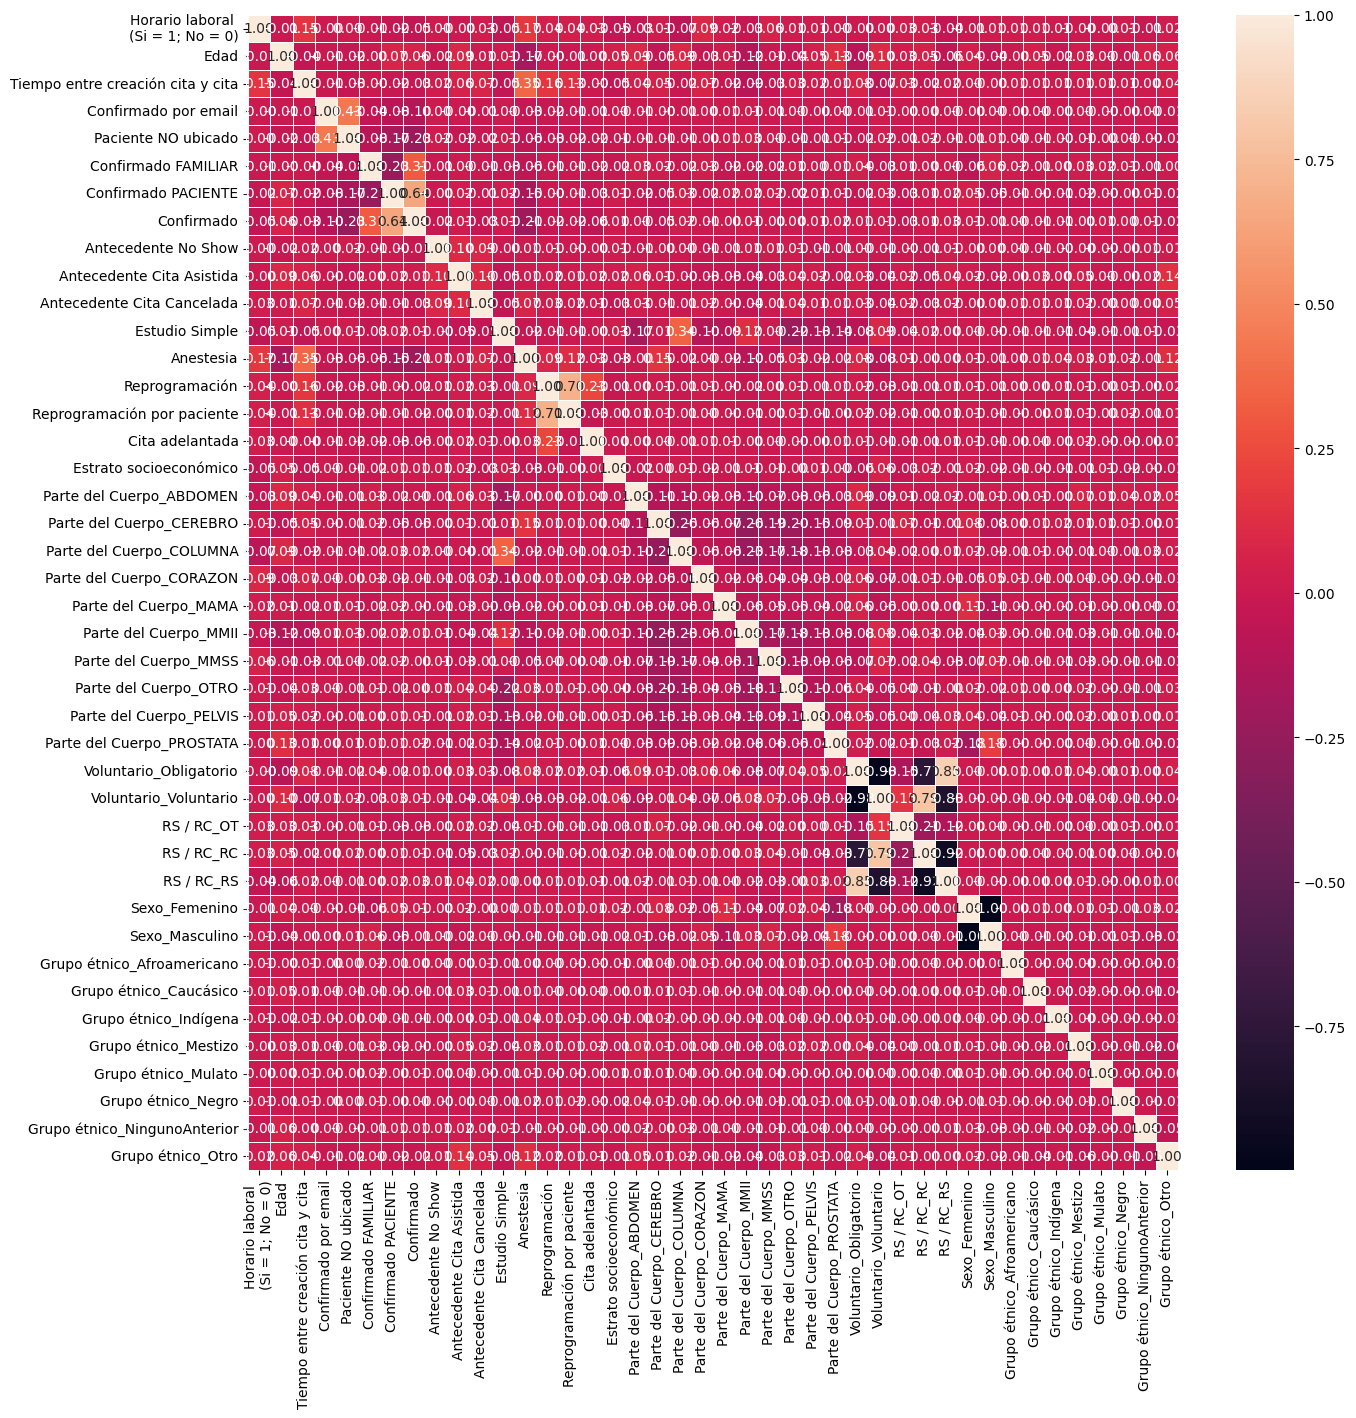

In [267]:
plt.figure(figsize=(15,15))
sns.heatmap(encoded_feature_df.corr(method='pearson',numeric_only=True),annot=True,linewidth=0.5,fmt='0.2f')

## TRATAMIENDO DE DATOS FALTANTES

### IMPUTACION DE DATOS

In [268]:
encoded_feature_df.isna().sum().sort_values()

Horario laboral \n(Si = 1; No = 0)       0
Parte del Cuerpo_MMSS                    0
Parte del Cuerpo_OTRO                    0
Parte del Cuerpo_PELVIS                  0
Parte del Cuerpo_PROSTATA                0
Voluntario_Obligatorio                   0
Voluntario_Voluntario                    0
RS / RC_OT                               0
RS / RC_RC                               0
RS / RC_RS                               0
Sexo_Femenino                            0
Sexo_Masculino                           0
Grupo étnico_Afroamericano               0
Grupo étnico_Caucásico                   0
Grupo étnico_Indígena                    0
Grupo étnico_Mestizo                     0
Grupo étnico_Mulato                      0
Grupo étnico_Negro                       0
Parte del Cuerpo_MMII                    0
Parte del Cuerpo_MAMA                    0
Parte del Cuerpo_CORAZON                 0
Parte del Cuerpo_COLUMNA                 0
Edad                                     0
Tiempo entr

Como la columna ***Estrato socioeconómico*** es de las que tiene mayor importancia, se procederá a imputar los datos falatntes con la media





In [269]:
mean = encoded_feature_df['Estrato socioeconómico'].mean()
encoded_feature_df['Estrato socioeconómico'] = encoded_feature_df['Estrato socioeconómico'].fillna(mean)

In [270]:
encoded_feature_df.isna().sum().sort_values()

Horario laboral \n(Si = 1; No = 0)    0
Parte del Cuerpo_MMSS                 0
Parte del Cuerpo_OTRO                 0
Parte del Cuerpo_PELVIS               0
Parte del Cuerpo_PROSTATA             0
Voluntario_Obligatorio                0
Voluntario_Voluntario                 0
RS / RC_OT                            0
RS / RC_RC                            0
RS / RC_RS                            0
Sexo_Femenino                         0
Sexo_Masculino                        0
Grupo étnico_Afroamericano            0
Grupo étnico_Caucásico                0
Grupo étnico_Indígena                 0
Grupo étnico_Mestizo                  0
Grupo étnico_Mulato                   0
Grupo étnico_Negro                    0
Parte del Cuerpo_MMII                 0
Parte del Cuerpo_MAMA                 0
Parte del Cuerpo_CORAZON              0
Parte del Cuerpo_COLUMNA              0
Edad                                  0
Tiempo entre creación cita y cita     0
Confirmado por email                  0


# Implementacion de modelos

- XGBoost
- Ramdom Forest

In [271]:
encoded_feature_df.shape

(29171, 42)

In [272]:
encoded_target_feature.shape

(29171,)

Funciones para vizualizar el rendimiento

In [273]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

In [309]:
def metrics(target,prediction):
  conf_matrix = confusion_matrix(target,prediction)
  score = accuracy_score(target, prediction)
  report = classification_report(target, prediction,output_dict=True)
  kappa = cohen_kappa_score(target,prediction)

  metrics = [conf_matrix, score, report,kappa]
  return metrics

In [275]:
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix')
    plt.show()

In [276]:
def visualize_report(report):
    # Define custom colors
    colors = ['#ffdfdf', '#dfffff', '#dfffdf', '#dfdfff', '#ffdfff', '#ffffdf']

    # Extracting metrics for each class
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = {metric: [] for metric in metrics}
    labels = []

    # Include class-specific metrics
    for cls, metrics_values in report.items():
        if cls.isdigit() or cls in ['macro avg', 'weighted avg']:
            labels.append(cls)
            for metric in metrics:
                data[metric].append(metrics_values.get(metric, None))

    # Convert data to DataFrame for easy plotting
    df = pd.DataFrame(data, index=labels)

    # Creating subplots for each metric
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for ax, metric in zip(axes, metrics[:-1]):  # Exclude 'support' for plotting
        sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
        ax.set_title(f'{metric.capitalize()} by Class')
        ax.set_ylim(0, 1.1)

    plt.tight_layout()
    plt.show()

In [277]:
def plot_kappa(kappa):
  plt.bar(['Cohen\'s Kappa'], [kappa])
  plt.ylabel('Cohen\'s Kappa')
  plt.title('Cohen\'s Kappa Score')
  plt.show()

### XGBoost

In [278]:
import xgboost as xgb
from numpy import array
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp , STATUS_OK

Establecemos el tamaño de nuestro set de prueba a 30% del total de datos con el argumento test_size=.3, de este modo, el set de entramiento tendrá un tamaño del 70% del total de datos. Finalmente, el argumento random_state=1999 es usado para replicar los resultados.

In [279]:
X_train, X_test, y_train, y_test = train_test_split(encoded_feature_df,encoded_target_feature,test_size=.3, random_state=0)

**Convertir a DMatrix**


La implementación XGBoost de R requiere que los datos que usemos sean matrices, específicamente de tipo DMatrix, así que necesitamos convertir nuestros sets de entrenamiento y prueba a este tipo de estructura.

In [280]:
data_train_matrix = xgb.DMatrix(X_train,label= y_train)
data_test_matrix = xgb.DMatrix(X_test,label= y_test)

In [281]:
data_train_matrix

In [282]:
data_test_matrix

Fine tuning for XGBoost

In [283]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [284]:
# Define the objective function to minimize
def objective(params):
    params['max_depth'] = int(params['max_depth'])
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return {'loss': -score, 'status': STATUS_OK}

# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print("Best set of hyperparameters: ", best_params)

100%|██████████| 100/100 [01:01<00:00,  1.61trial/s, best loss: -0.8611745886654479]
Best set of hyperparameters:  {'colsample_bytree': 0.8543803227914812, 'gamma': 2.418471651480059, 'max_depth': 3.0, 'min_child_weight': 9.0, 'reg_alpha': 41.0, 'reg_lambda': 0.2994386828520209}


In [285]:
# instantiate the classifier
best_params['max_depth'] = int(best_params['max_depth'])
xgb_clf = xgb.XGBClassifier(**best_params)
evalset = [(X_train, y_train), (X_test,y_test)]

In [286]:
# fit the classifier to the training data
xgb_clf.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.42792	validation_1-logloss:0.42706


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-logloss:0.39748	validation_1-logloss:0.39702
[2]	validation_0-logloss:0.37918	validation_1-logloss:0.37913
[3]	validation_0-logloss:0.36719	validation_1-logloss:0.36716
[4]	validation_0-logloss:0.36043	validation_1-logloss:0.36095
[5]	validation_0-logloss:0.35318	validation_1-logloss:0.35466
[6]	validation_0-logloss:0.34734	validation_1-logloss:0.34912
[7]	validation_0-logloss:0.34406	validation_1-logloss:0.34609
[8]	validation_0-logloss:0.34108	validation_1-logloss:0.34395
[9]	validation_0-logloss:0.33915	validation_1-logloss:0.34221
[10]	validation_0-logloss:0.33727	validation_1-logloss:0.34080
[11]	validation_0-logloss:0.33601	validation_1-logloss:0.33966
[12]	validation_0-logloss:0.33501	validation_1-logloss:0.33891
[13]	validation_0-logloss:0.33383	validation_1-logloss:0.33815
[14]	validation_0-logloss:0.32938	validation_1-logloss:0.33334
[15]	validation_0-logloss:0.32889	validation_1-logloss:0.33298
[16]	validation_0-logloss:0.32676	validation_1-logloss:0.33065
[

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8543803227914812, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2.418471651480059,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=9.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [287]:
y_pred = xgb_clf.predict(X_test)

In [288]:
results = xgb_clf.evals_result()

In [289]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8612


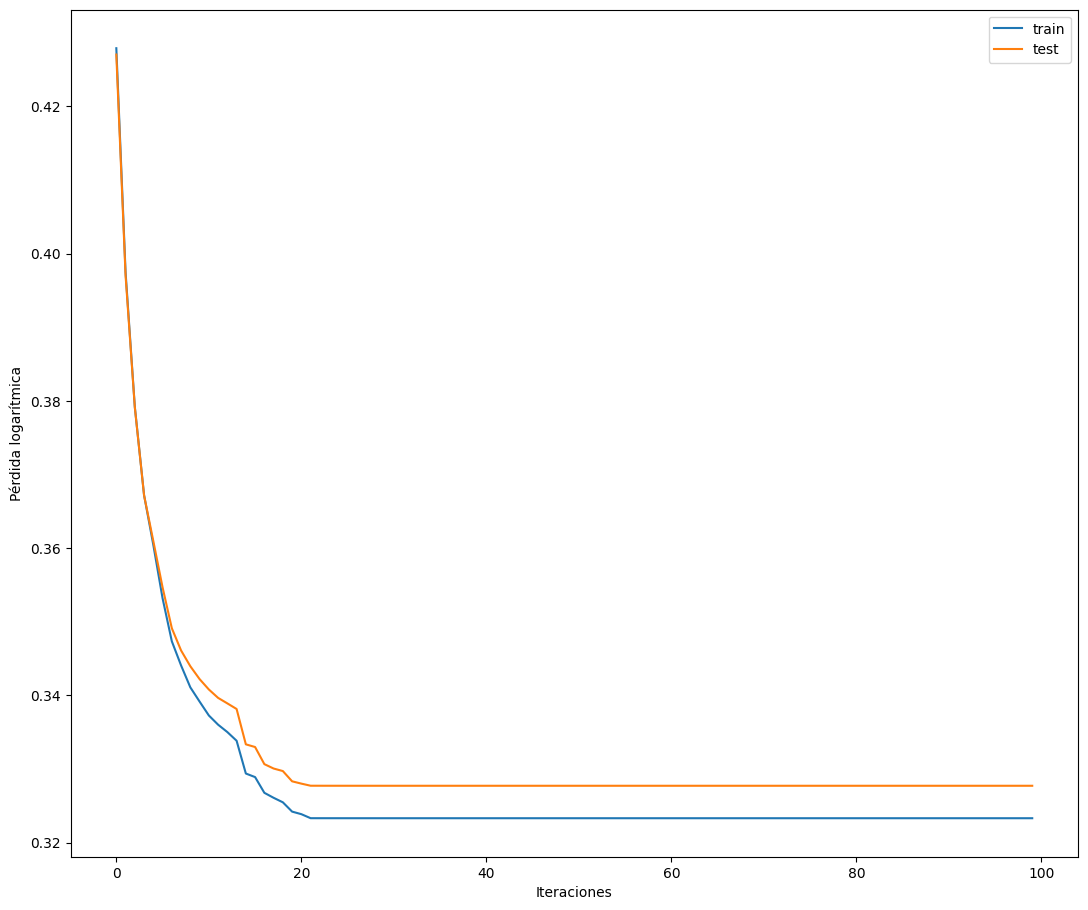

In [290]:
from matplotlib import pyplot
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
pyplot.xlabel('Iteraciones')
pyplot.ylabel('Pérdida logarítmica')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Importancia de atributos

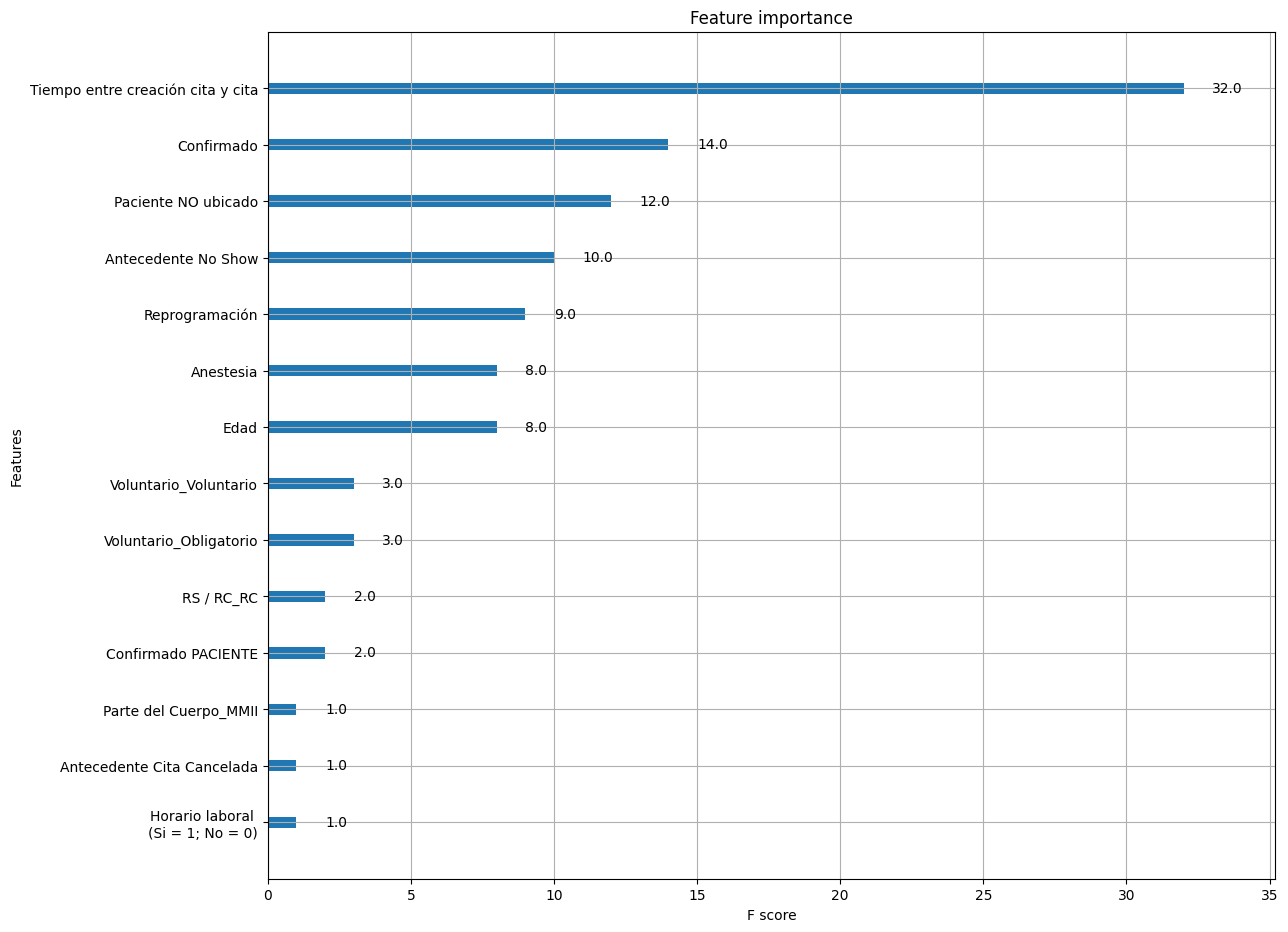

In [291]:
plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [13, 11]
plt.show()

Evaluacion del modelo

In [292]:
conf_matrix, _ , report, kappa  = metrics(y_test, y_pred)

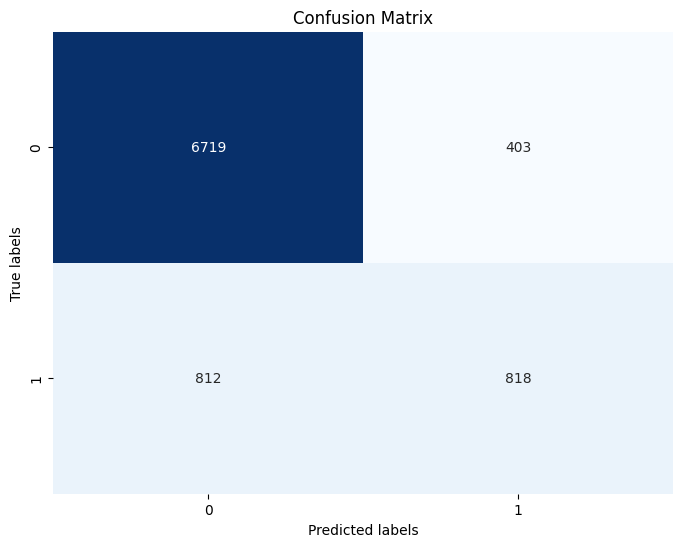

In [293]:
plot_confusion_matrix(conf_matrix)

<ipython-input-276-93aaf0c90dfe>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-276-93aaf0c90dfe>:23: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-276-93aaf0c90dfe>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-276-93aaf0c90dfe>:23: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-276-93aaf0c

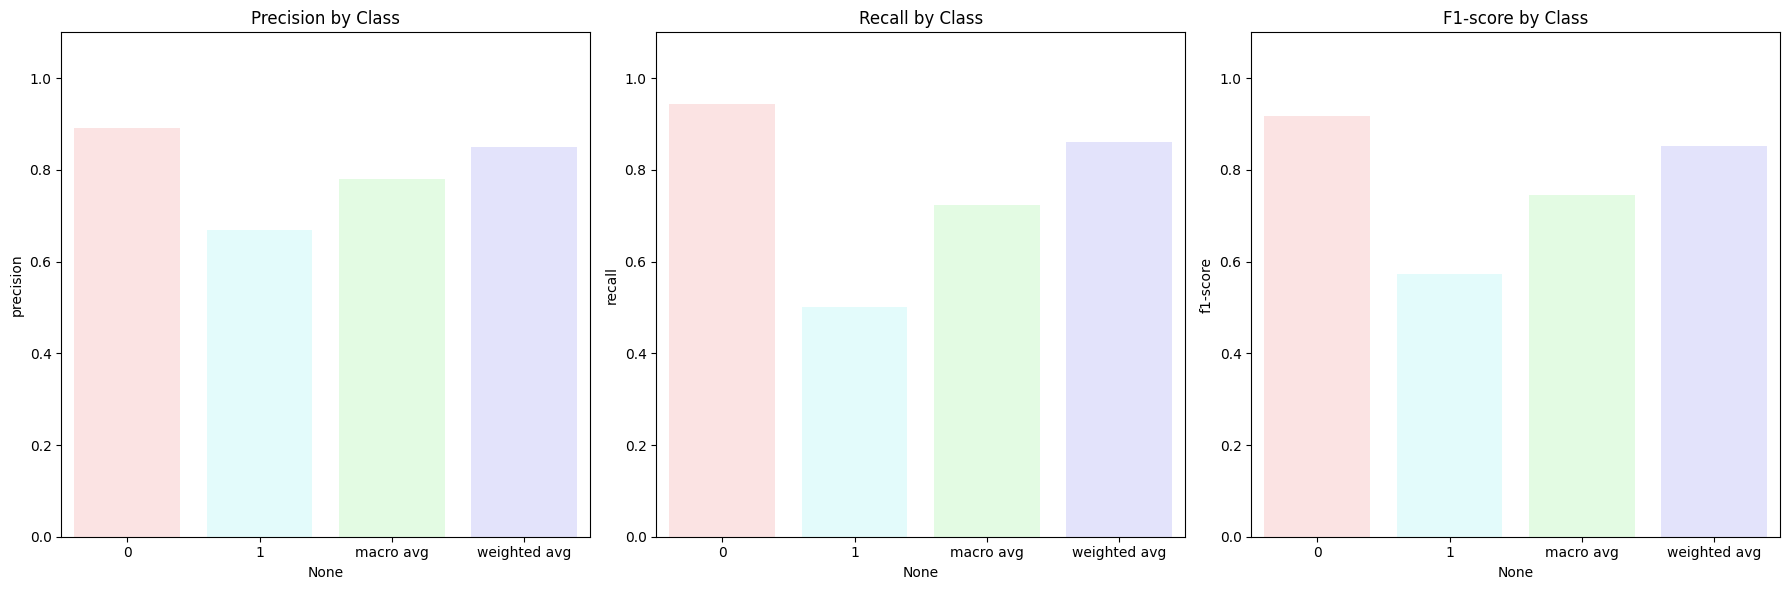

In [294]:
visualize_report(report)

In [295]:
print("Kappa: ",kappa)

Kappa:  0.49294594776566203


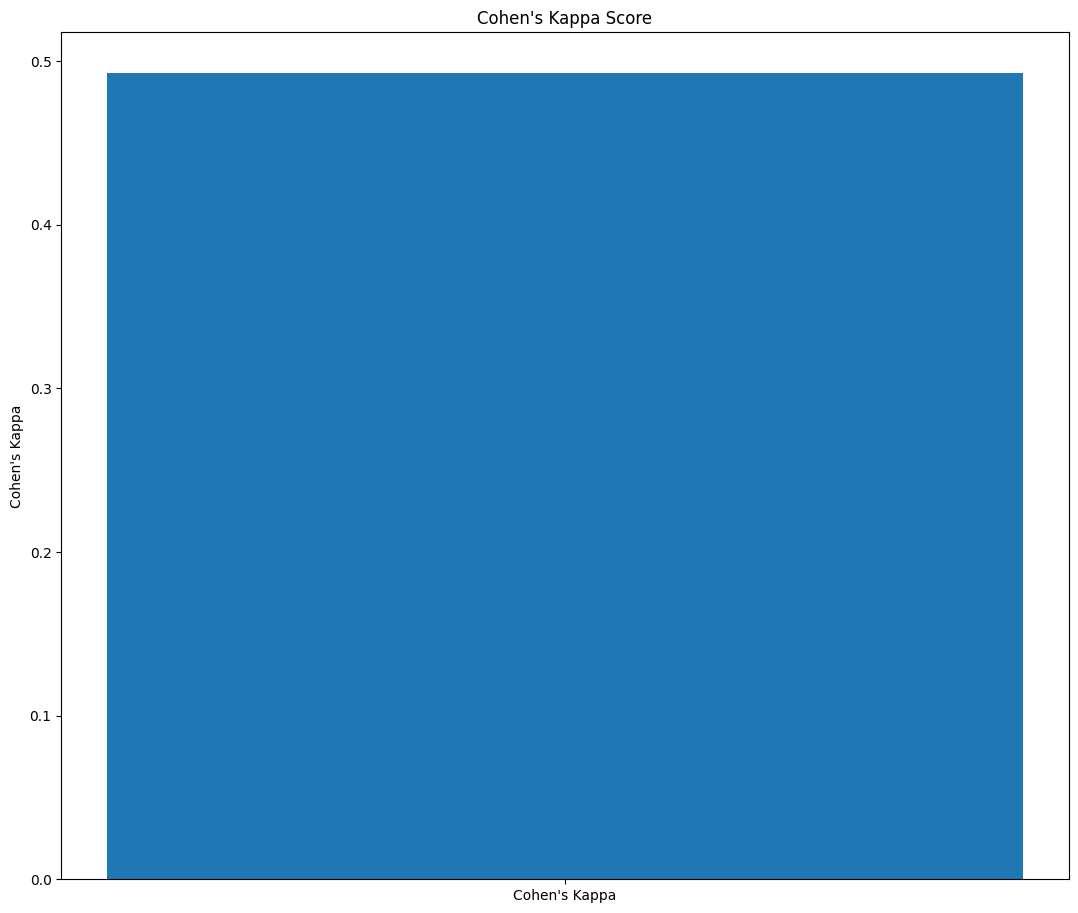

In [296]:
plot_kappa(kappa)

### Ramdom Forest

In [297]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [298]:
X_train, X_test, y_train, y_test = train_test_split(encoded_feature_df,encoded_target_feature,test_size=.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [299]:
y_pred = rf.predict(X_test)

In [300]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8634104541559554


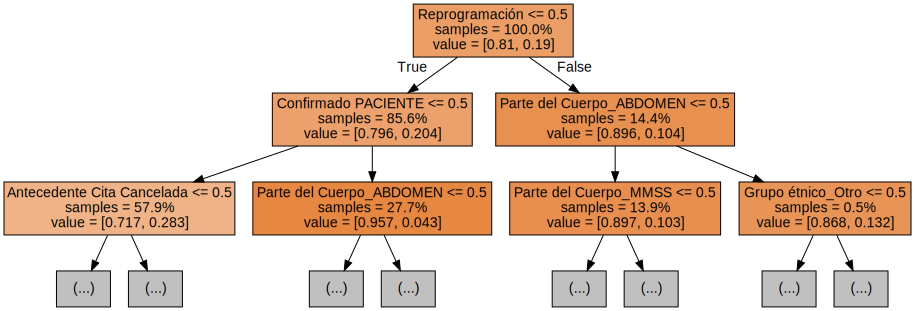

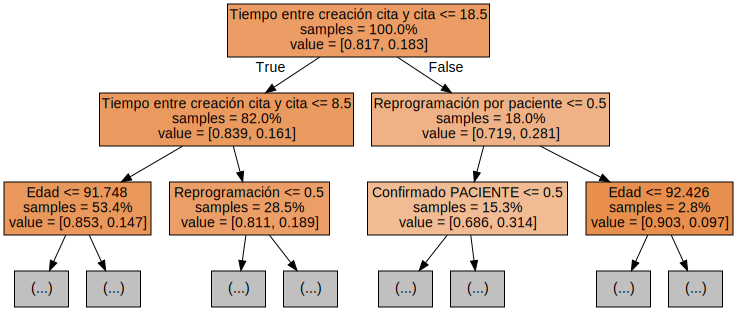

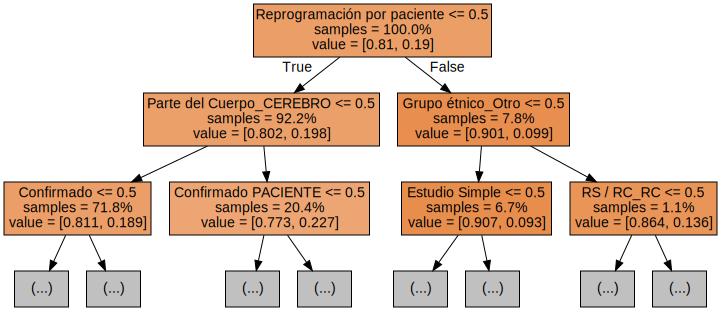

In [301]:
# Export the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

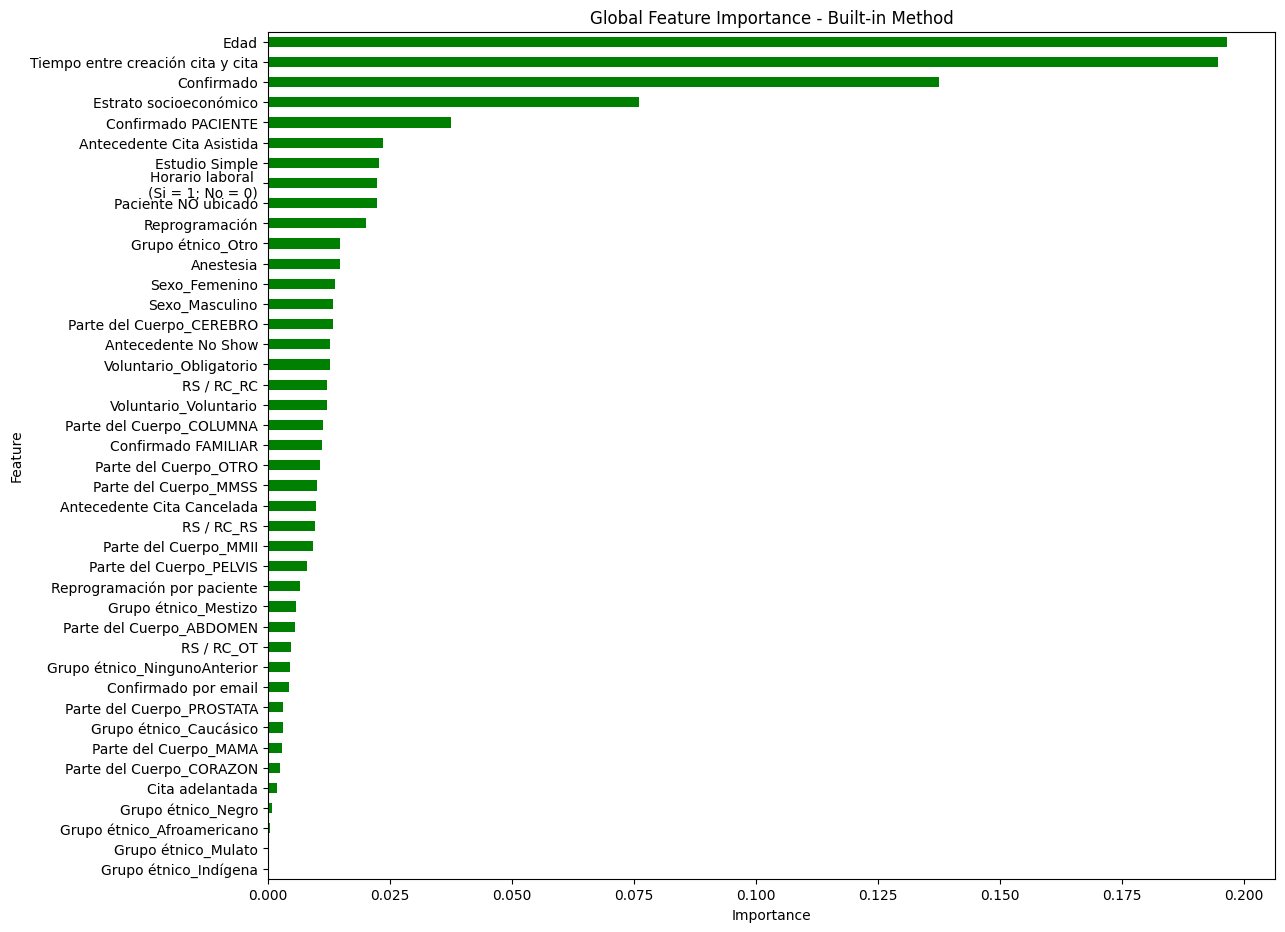

In [307]:
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.rcParams['figure.figsize'] = [13, 11]
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

In [311]:
conf_matrix_tree, _, report_tree , _  = metrics(y_test,y_pred)

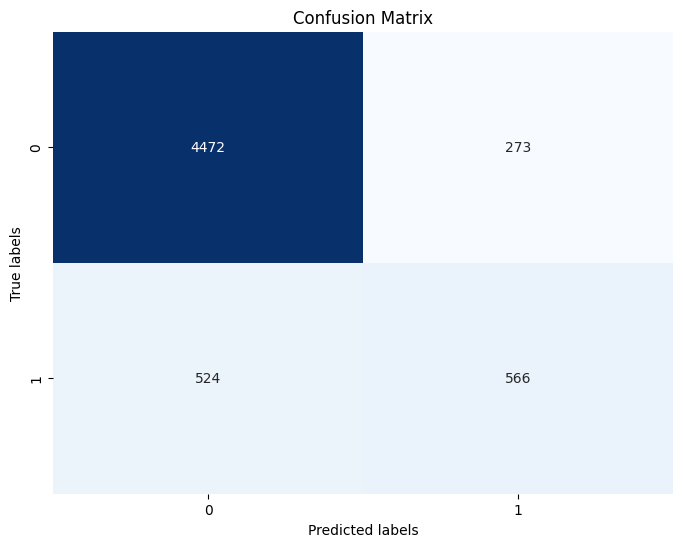

In [312]:
plot_confusion_matrix(conf_matrix_tree)

<ipython-input-276-93aaf0c90dfe>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-276-93aaf0c90dfe>:23: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-276-93aaf0c90dfe>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-276-93aaf0c90dfe>:23: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(ax=ax, x=df.index, y=metric, data=df, palette=colors)
<ipython-input-276-93aaf0c

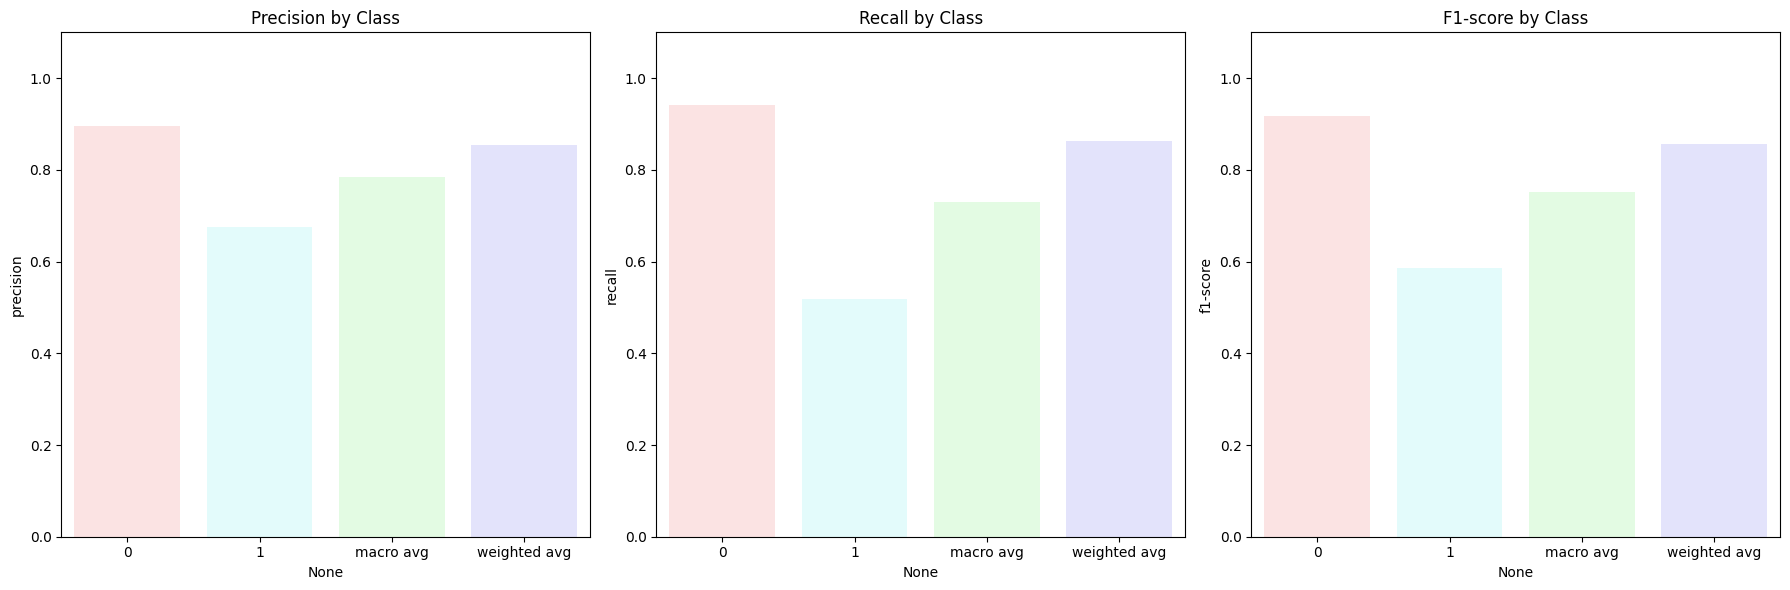

In [313]:
visualize_report(report_tree)